## Ridge回帰による正則化（過学習の抑制）

先の例では6次の多項式回帰から過学習が起こっていた。  
以下ではそれを是正するために、正則化項を加えることで  
元の回帰係数の絶対値が大きくなり過ぎることを防ぐ。  
式(1.4)を参照。

※正則化項がなぜwのノルムで表現されるかについては、  
1.2.5で学ぶ。実はベイズ的なアプローチによって、  
この項が現れるということがわかる。

In [1]:
#ライブラリをインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

データの準備

In [2]:
#sin関数にノイズを追加して訓練データを作成
np.random.seed(seed=8) #乱数を固定
X = np.random.uniform(0, 4, 15)[:, np.newaxis] #一様分布に従う乱数を発生
y = np.sin(1/4 * 2 * np.pi * X).ravel() + np.random.normal(0, 0.3, 15) #sin関数に正規分布に従うノイズを追加

#特徴量の多項式変換
POLY = PolynomialFeatures(degree=6, include_bias = False) #6次多項式に変換
X_pol = POLY.fit_transform(X)

線形回帰モデルとRidge回帰モデルの訓練

In [3]:
#正則化なしと正則化ありのモデルを作成
model = LinearRegression()
model2 = Ridge(alpha=0.1)

#多項式変換した特徴量と正解を用いてモデルの訓練
model.fit(X_pol, y)
model2.fit(X_pol, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

上記alphaは教科書で言うところのλにあたる。

線形回帰モデルとRidge回帰モデルをプロット

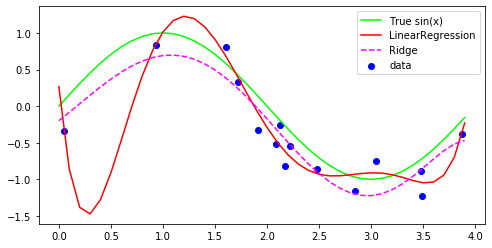

In [5]:
plt.figure(figsize=(8,4)) #サイズ指定

#プロット用にX_pltを作成
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
#正解のプロット
y_true = np.sin(1/4 * 2 * np.pi * X_plt).ravel()
#予測モデルのプロット
y_pred = model.predict(POLY.transform(X_plt))
y_pred2 = model2.predict(POLY.transform(X_plt))

#sin関数への正則ありとなしの回帰モデル
plt.scatter(X, y, color='blue', label='data') #元データを散布図にプロット
plt.plot(X_plt, y_true, color='lime', linestyle='-', label='True sin(x)') #真のsin関数をプロット
plt.plot(X_plt, y_pred, color='red', linestyle='-', label='LinearRegression') #多項式回帰曲線をプロット
plt.plot(X_plt, y_pred2, color='magenta', linestyle='--', label='Ridge') #Ridge回帰曲線をプロット
plt.legend(loc='upper right')

plt.show()

確かに正則化項を入れなかった時よりも過学習を防げている。  

## データ数を増やすことによる過学習の抑制

データ数は多ければ多いほど良い。それを教えてやる。

データの準備（その２；データ数を15個から100個に変更）

In [6]:
#sin関数にノイズを追加して訓練データを作成
np.random.seed(seed=8) #乱数を固定
X = np.random.uniform(0, 4, 100)[:, np.newaxis] #一様分布に従う乱数を100個発生
y = np.sin(1/4 * 2 * np.pi * X).ravel() + np.random.normal(0, 0.3, 100) #sin関数に正規分布に従うノイズを追加

#特徴量の多項式変換
POLY = PolynomialFeatures(degree=6, include_bias = False) #6次多項式に変換
X_pol = POLY.fit_transform(X)

正則化項を加えずに勝負する。

In [7]:
#線形モデルの構築
model = LinearRegression()
model.fit(X_pol, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

作った回帰曲線のお絵かきをしてみよう。

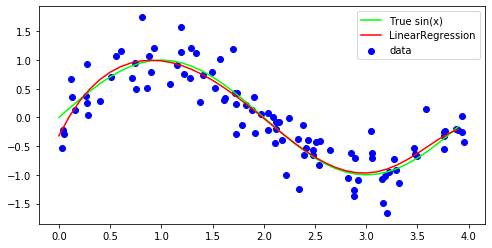

In [8]:
plt.figure(figsize=(8,4)) #サイズ指定

#プロット用にX_pltを作成
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
#正解のプロット
y_true = np.sin(1/4 * 2 * np.pi * X_plt).ravel()
#予測モデルのプロット
y_pred = model.predict(POLY.transform(X_plt))

#回帰モデル
plt.scatter(X, y, color='blue', label='data') #元データを散布図にプロット
plt.plot(X_plt, y_true, color='lime', linestyle='-', label='True sin(x)') #真のsin関数をプロット
plt.plot(X_plt, y_pred, color='red', linestyle='-', label='LinearRegression') #多項式回帰曲線をプロット
plt.legend(loc='upper right')

plt.show()

データ数は力、力こそ全てである。

Lasso回帰はまた出てきたときに勉強しましょう。  

※正則化項がwのノルムではなく、絶対値で表現される。